# **New York Pretrial Release Prediction Problem Set Notebook for Legal Studies 123 (Data, Prediction, & Law)**

## **Introduction**

On January 1, 2020, [a new bail law](https://www.brennancenter.org/our-work/analysis-opinion/new-yorks-upcoming-bail-reform-changes-explained) restricting the circumstances under which pretrial detention and cash bail could be imposed went into effect in New York state. State legislators sought to lower the population of people who were jailed because they could not afford bail before their trial. While well-intentioned, the legislation received criticism from people across the political spectrum. A common concern was that crime would increase as a result of these changes, despite a lack of data to support this claim. Subsequent [reforms](https://www.brennancenter.org/our-work/analysis-opinion/new-yorks-latest-bail-law-changes-explained), which went into effect on July 1, 2020, broadened the situations under which cash bail could be set.

[Arraignments](https://colab.research.google.com/drive/1qYsW3AxhK1C0dC3So-6lxVRvVfWq1A_k#scrollTo=QvKhzwX1-wzh&line=5&uniqifier=1) are hearings where defendants are presented with and respond to the charges against them. This is also where presiding judges decide whether to detain them and set bail. In this problem set, we will be predicting and analyzing judge predictions of defendant flight risk at arraignment hearings. We will focus on the ROR_at_Arraign variable – which indicates whether or not the judge released the defendant on their own recognizance – in the provided dataset to be a representation of this. (Releasing someone on their own recognizance means they are released without having to post bail, which indicates that the judge believes you are not a flight risk and will likely return to court for your scheduled appearances). We are aiming to predict ROR_at_Arraign for this problem set because it is a more common outcome than being remanded to jail.

To do so, we will be using [pretrial release data](https://ww2.nycourts.gov/pretrial-release-data-33136). Note that the data extend through the end of 2022; they are updated biannually, and now separate New York City from upstate New York. This data is similar to the dataset used in Kleinberg et. al’s paper, “Human Decisions and Machine Predictions.”



- Following the roadmap of the Data Science Lifecycle while reflecting on ethical considerations.

- Cleaning messy publicly available data and documenting your process clearly.

- Applying and rationalizing different predictive modeling techniques for a given dataset.

- Evaluating the relative performance of different models and justifying the selection of a particular model.

- Comparing models against an external benchmark and contextualizing results.


The Data Science Lifecycle gives us a way to understand the workflow when building something like a prediction model using data. The lifecyle is not linear, in that at any point you may have to go back and reassess previous steps. This is an important part of building anything using data from the real world. In addition to using data to make a model that leads to "reports, decisions, and solutions," it is equally as pivotal to infuse ethical considerations into each step of the lifecycle. This includes questions about bias, discrimination, fairness, transparency, and more. In some cases it means asking questions about if your model should actually be made instead of how it should.

In building our judge decision model in this problem set, we will use the lifecycle to guide us.

## **The Data Science Lifecycle**
*Credit: Data 100 at XXX (university)*

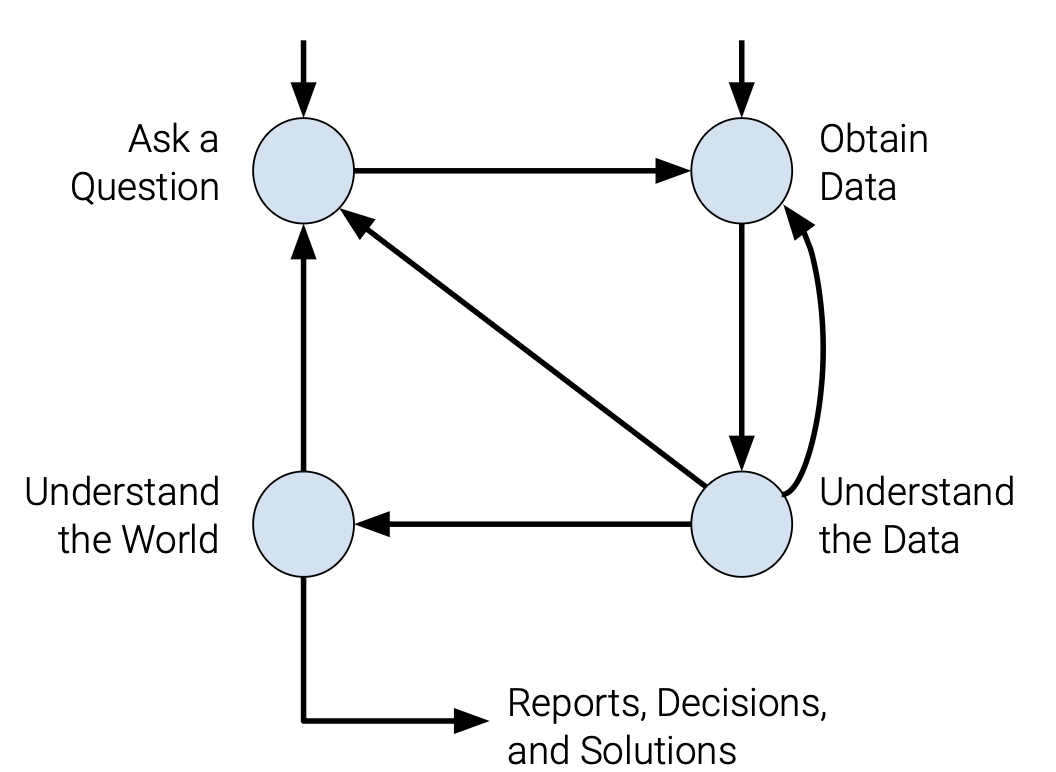

## **ASK A QUESTION – Question/ Problem Formulation**

**Our question:  Can we use a model to predict what decision a judge will make at arraignment? More specifically, can a model predict whether a judge will release a defendant on their own recognizance?**


This is a different question than Kleinberg et al., who are focused on calculating the supposed “risk” of an individual defendant using statistical methods. Kleinberg et al. ask, broadly: **Can machine learning improve human decision making?** in "[Human Decisions and Machine Predictions](https://www.nber.org/papers/w23180)," as they use pretrial release data to compare an algorithm's prediction of a released defendant's behavior (i.e., fleeing, committing another crime) to a judge's –– effectively replicating the calculation that a judge is required to make when deciding where a defendant will await trial.

As technology advances to the point where incredibly large datasets can be processed, applications of machine learning have sprawled across industries and systems – including the United States criminal justice system. Take the [COMPAS algorithm](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing), which used a machine learning model to compute "risk scores" for defendants, or predictive policing models – all of which have been used to augment human decision making, in turn having a direct impact on people's lives. Kleinberg et al. ultimately conclude that machine learning can improve judge decision making, i.e. what they decide to do with the defendant at the time of their arraignment.

(a) What stakeholders are implicated by the question that Kleinberg et al. are asking/ the problem they are trying to solve? (ex: judges, defendants, law enforcement, etc.). Compare this to the stakeholders that are implicated by the question we are asking. *Consider how Kleinberg et al. are framing the use of data science itself – as a supplement or replacement to human decision making – versus how we are framing it.*

**Sample Solution (Main Points):**

- "Stakeholder" is a term that has been used by scholars and policymakers in the field of data and AI ethics. Broadly, it means anyone who is either involved in building an algorithm or anyone who is impacted by its decisions.
- In this case, we are using techniques from machine learning to put judge decision making to the test. That is, we are beginning from the assumption that computational techniques may be better at human judges when it comes to making decisions at arraignment.
- Thus, if the algorithm we are building is implemented, it would likely impact judges (think about how their decision-making would change at arraignment) as well as defendants (think about how automated decision-making could impact human lives).

(b) Though Kleinberg et al. are NOT suggesting this, think about a world where a machine learning or predictive model replaced the labor of human judges. Do you think this would be a good idea? Who would be impacted by this automation?

**Sample Solution (Main Points):**

- Automated decision-making tools in the criminal justice system (e.g., COMPAS, PATTERN) are implemented based on the misplaced assumption of algorithmic objectivity. That is, the belief that because a system is made with data, it is inherently objective.
- Due to the areas in which bias and discrimination can be introduced into algorithmic tools (ex: in the data itself, etc.), this is not necessarily true. It is the case that these tools can perpetuate the marginalization of groups already disadvantaged by the criminal justice system.

## **OBTAIN DATA – Data Acquisition**

The data-generating process–– that is, why and how data was collected–– has implications for how we approach the data and what we do with it. Along with the bail policy changes, the first iteration of the law was accompanied by a mandate to collect the [pretrial release data](https://ww2.nycourts.gov/pretrial-release-data-33136) (which we are using for this problem set).

(a) How should the context in which this data was produced impact the way we understand it - from data cleaning to modeling? (Think about where the data came from, who produced it, and for what purpose.)

**Sample Solution (Main Points):**

- This dataset was created as a result of bail reform in New York. In other words, it is not clean and nice and beautiful, nor is it tailored for social science research.
- We should view this data as a product of the system that generated it. That is, we should notice that the data was produced by humans involved in the NY court system.
- Human error (e.g. inputting 0's for age when data is missing) thus introduces inconsistency into our data.

(b) Take a look at the [documentation](https://www.nycourts.gov/legacypdfs/court-research/Pretrial%20Release%20Data%20documentation-%20for%20website.pdf) of this dataset. Is it transparent?

**Sample Solution (Main Points):**

- Not really.
- Some features are self explanatory, such as age and type of decision.
- However, the dataset involves acronyms that go unexplained in the documentation. Further, for example, no explanation is provided as to how missing data was encoded (i.e. when it was imputed as 0 versus NaN).
- For this question, students should pinpoint at least one or two points in the documentation that are unclear to them.

## **UNDERSTAND THE DATA – Exploratory Data Analysis & Visualization**

#### **Data Cleaning and Exploratory Data Analysis**

In [1]:
#Import the necessary packages.

import numpy as np
import scipy
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load the dataset.

  # (a) Download the CSV from DCJS website.
  # (b) Upload the CSV into your Google Drive
  # (c) Mount your Google Drive to this Google Colab notebook (i.e., grant it access to your files).
  # (d) Read the CSV in using pd.read_csv with the file path name from your Google Drive.

data = pd.read_csv('/content/drive/MyDrive/Legal Studies 123/Pretrial Release Data 2020 - 2022 6-30.csv')
data

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0xD3CD95500429FE2CAA4000D839002775CF76D3DC5027...,Female,Black,Unknown,29,29,Nassau District Court,NY029013J,Nassau,District 10N,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,782787.0
1,0x06F8C6AEB7E0B80BE48F59421DF53042C55F4E1DE047...,Male,Black,Non Hispanic,29,29,Troy City Court,NY041021J,Rensselaer,District 3,...,1.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,791790.0
2,0x7A4C2FF5CF183368E75FCAB46F5284AA82640CEB0694...,Female,White,Hispanic,22,22,Yonkers City Court,NY059051J,Westchester,District 9,...,0.0,0.0,1.0,0.0,0.0,No Arrest,NaN,0.0,NaN,473217.0
3,0x7F4BD0EDD8FC879A2E1484EF169F1CCED0F26487A554...,Female,Unknown,Unknown,33,33,Jamestown City Court,NY006011J,Chautauqua,District 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x9B6A6F7372B141F23EBBF60BDB429DE7787F797CD2CD...,Male,Black,Non Hispanic,49,49,Suffolk 1st District Court,NY051033J,Suffolk,District 10S,...,10.0,0.0,1.0,0.0,0.0,No Arrest,NaN,0.0,NaN,610021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582976,0x08849779531465D598B171ED7EC577133D17615968F1...,Male,Black,Non Hispanic,17,0,Erie County Court,NY014013J,Erie,District 8,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,73537.0
582977,0x820F48E0EA4C9F5492E9FC60FD1F85B30DC0A33AB24D...,Male,Black,Non Hispanic,16,0,New York Supreme Criminal Court,NY030015J,New York,District 1,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,NaN
582978,0x032654E3B3D95D5EC493FA290EF382EF9F7FF1718D75...,Male,Black,Non Hispanic,17,0,Kings Supreme Criminal Court,NY023015J,Kings,District 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582979,0xA3147CE75E9C5C58BFB39772199392377EA3DD623179...,Male,White,Non Hispanic,16,0,Jefferson County Court,NY022013J,Jefferson,District 5,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,79865.0


(a) **Leakage**. Leakage is a term used in machine learning for when a model makes decisions using information that it would not actually have, resulting in unnaturally high performance. What would leakage look like in the context of this problem and dataset? *Hint: think about the entire criminal sentencing process (and what happens before and after arraignment).*

*Provide a short explanation of your choices here:*

**Solution**: In this problem and dataset, "leakage" would be any data that is not available to the judge at the time of arraignment. Our goal is to create a model that mimics judge prediction of defendant flight risk under the same circumstances in which the judge would make this decision. Our dataset contains features containing information pre-arraignment (e.g. age at arrest, charges at arrest, etc.), during arraignment (e.g. age at arraignment, laws at arraignment), and post-arraignment (e.g. convicted or not, rearrested or not). We would need to remove any of the features that happen after arraignment. This is because these features contain information that is unknown to the judge at the time that they make their decision at arraignment, and keeping them would result in artificial and decievingly accurate predictions for our model.


(i) Inspect the features in the dataset and their associated descriptions in the documentation. List the ones that must be removed to prevent data leakage.

*Provide a bulleted list of the features here:*

- ...
- ...

    ...
    
- ...

**Solution:**

- 'App_Count_Arraign_to_Dispo_Released'
- 'App_Count_Arraign_to_Dispo_Detained'
- 'App_Count_Arraign_to_Dispo_Total'
- 'Def_Attended_Sched_Pretrials'
- 'Contact_Pretrial_Service_Agency'
- 'Electronic_Monitoring'
- 'Travel_Restrictions'
- 'Passport_Surrender'
- 'No_Firearms_or_Weapons'
- 'Maintain_Employment'
- 'Maintain_Housing'
- 'Maintain_School'
- 'Placement_in_Mandatory_Program'
- 'Removal_to_Hospital'
- 'Obey_Order_of_Protection'
- 'Obey_Court_Conditions-Family_Offense'
- 'Other_NMR'
- 'Order_of_Protection'
- 'First_Bail_Set_Cash'
- 'First_Bail_Set_Credit'
- 'First_Insurance_Company_Bail_Bond'
- 'First_Secured_Surety_Bond'
- 'First_Secured_App_Bond'
- 'First_Unsecured_Surety_Bond'
- 'First_Unsecured_App_Bond'
- 'First_Partially_Secured_Surety_Bond'
- 'Partially_Secured_Surety_Bond_Perc'
- 'First_Partially_Secured_App_Bond'
- 'Partially_Secured_App_Bond_Perc'
- 'Bail_Made_Indicator'
- 'Warrant_Ordered_btw_Arraign_and_Dispo'
- 'First_Bench_Warrant_Date','Non_Stayed_WO'
- 'Num_of_Stayed_WO'
- 'Num_of_ROW'
- 'Docket_Status'
- 'Disposition_Type'
- 'Disposition_Detail'
- 'Dismissal_Reason'
- 'Disposition_Date'
- 'Most_Severe_Sentence'
- 'Top_Conviction_Law'
- 'Top_Conviction_Article_Section'
- 'Top_Conviction_Attempt_Indicator'
- 'Top_Charge_at_Conviction'
- 'Top_Charge_Severity_at_Conviction'
- 'Top_Charge_Weight_at_Conviction'
- 'Top_Charge_at_Conviction_Violent_Felony_Ind'
- 'Days_Arraign_Remand_First_Released'
- 'Known_Days_in_Custody'
- 'Days_Arraign_Bail_Set_to_First_Posted'
- 'Days_Arraign_Bail_Set_to_First_Release'
- 'Days_Arraign_to_Dispo'
- 'UCMSLiveDate'
- 'rearrest'
- 'rearrest_date'
- 'rearrest_firearm'
- 'rearrest_date_firearm'


In [3]:
#Drop the columns above.
data_dropped = data.drop(columns=['App_Count_Arraign_to_Dispo_Released', 'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total', 'Def_Attended_Sched_Pretrials', 'Contact_Pretrial_Service_Agency', 'Electronic_Monitoring','Travel_Restrictions', 'Passport_Surrender', 'No_Firearms_or_Weapons', 'Maintain_Employment','Maintain_Housing', 'Maintain_School','Placement_in_Mandatory_Program', 'Removal_to_Hospital','Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR', 'Order_of_Protection', 'First_Bail_Set_Cash','First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond', 'First_Secured_Surety_Bond', 'First_Secured_App_Bond','First_Unsecured_Surety_Bond', 'First_Unsecured_App_Bond', 'First_Partially_Secured_Surety_Bond','Partially_Secured_Surety_Bond_Perc','First_Partially_Secured_App_Bond','Partially_Secured_App_Bond_Perc', 'Bail_Made_Indicator','Warrant_Ordered_btw_Arraign_and_Dispo', 'First_Bench_Warrant_Date','Non_Stayed_WO', 'Num_of_Stayed_WO', 'Num_of_ROW', 'Docket_Status','Disposition_Type', 'Disposition_Detail', 'Dismissal_Reason','Disposition_Date', 'Most_Severe_Sentence', 'Top_Conviction_Law','Top_Conviction_Article_Section','Top_Conviction_Attempt_Indicator', 'Top_Charge_at_Conviction','Top_Charge_Severity_at_Conviction','Top_Charge_Weight_at_Conviction','Top_Charge_at_Conviction_Violent_Felony_Ind','Days_Arraign_Remand_First_Released', 'Known_Days_in_Custody','Days_Arraign_Bail_Set_to_First_Posted','Days_Arraign_Bail_Set_to_First_Release', 'Days_Arraign_to_Dispo','UCMSLiveDate', 'rearrest', 'rearrest_date', 'rearrest_firearm','rearrest_date_firearm', 'arr_cycle_id'])
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582981 entries, 0 to 582980
Data columns (total 52 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Internal_Case_ID                          582981 non-null  object 
 1   Gender                                    582981 non-null  object 
 2   Race                                      582981 non-null  object 
 3   Ethnicity                                 582981 non-null  object 
 4   Age_at_Crime                              582981 non-null  int64  
 5   Age_at_Arrest                             582981 non-null  int64  
 6   Court_Name                                582981 non-null  object 
 7   Court_ORI                                 582981 non-null  object 
 8   County_Name                               582981 non-null  object 
 9   District                                  582981 non-null  object 
 10  Region              

(b) **Missing values.**

Read this article on the importance of missing values in machine learning tasks: “[Missing the missing values: The ugly duckling of fairness in machine learning](https://onlinelibrary.wiley.com/doi/10.1002/int.22415?af=R).” Then, reflect:

(i) Which features have the greatest proportion of missing values? Why do you think that is (think about the data collection process, the meaning of and representation of each feature, etc.)?

In [4]:
#Use a pandas function to find the proportion of missing values for each feature.
nan_value_props = data_dropped.isna().mean()[data.isna().sum()>0].rename('nan_proportion')
nan_value_props

,nan_proportion
Judge_Name,0.002842
Offense_Month,0.003875
Offense Year,0.003875
Arrest_Month,0.029087
Arrest Year,0.029087
Arrest_Type,0.078304
Top_Arrest_Law,0.019735
Top_Arrest_Article_Section,0.019745
Top_Charge_at_Arrest,0.019735
Top_Charge_Severity_at_Arrest,0.019759


In [5]:
#Decide how to deal with missing values based on your observations above.

#Impute columns of your choice with 0.
#Hint: You should impute NaNs with 0 for features where having 0 of something would significant to a judge.
  #solution: impute columns that indicate prior convictions or arrests with 0
cols_impute_to_zero = ['Top_Arraign_Attempt_Indicator', # attempted felony or not
                       'prior_vfo_cnt',
                       'prior_nonvfo_cnt',
                       'prior_misd_cnt',
                       'pend_vfo',
                       'pend_nonvfo',
                       'pend_misd',
                       'supervision' # was defendant under supervision at time of arraignment
                                    ]

# Create a function that replace NaN values for a list of variables, like those above, with an imputed value in a df.
def replace_missing(df, col_list, value):
    for col in col_list:
        df[col].fillna(value, inplace=True)

# Call the function on the columns that need 0s instead of NaNs.
replace_missing(data_dropped, cols_impute_to_zero, 0)

<ipython-input-5-3a97ebf4dd88>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value, inplace=True)


(ii) How will our decision about how we deal with missing values (i.e. dropping them altogether, replacing them with 0s, etc.) ultimately impact our model – not just in terms of accuracy, but in terms of fairness?

*Provide a discussion here ...*


**Sample solution:**

In this dataset, simply dropping the rows that have any or all null values, or dropping the columns that have many null values would be a disservice. This is because the columns that have many null values represent something that could be of significant influence in a judge's decision at arraignment – namely, the following factors: `prior_vfo_cont`, `prior_nonvfo_cont`, and `prior_misd_cnt`, which are all variables that indicate if a defendent has prior criminal history or not. In the dataset, these represent the count of previous nonviolent felonies, the count of previous violent felonies, and the count of previous misdemeanors, respectively. In this case, a null value means that the individual does not have a criminal history, which could be incredibly important in a judge's decision whether to release a defendant on their own recognizance or not. Dropping the rows with null values in the priors columns would result in an overrepresentation in our dataset of defendants that do have a criminal history. It would further not allow us to see if having no criminal history has any predictive power. Thus, instead of dropping the rows with null or the columns that have many null, the null values are instead replaced with 0s. The same reasoning applies to the columns `pend_vfo`, `pend_nonvfo`, and `pend_misd`, as these indicate if the defendent has any pending arrests for violent felonies, nonviolent felonies, and misdemeanors respectively. For these columns, null values are also converted into 0's to indicate no pending arrests. The feature supervision indicates if the defendant is under parole or probation at the time of arraignment, which could also factor into judge decision making. Thus, any null values in this column are also converted into 0's to indicate no supervision. The feature `Representation_Type` indicates what type of representation that the defendant has (e.g. public defender, private counsel, etc.); if they have no representation, there is a null value. Because the type and quality of representation is an important aspect of a criminal case, it is important to signal in our data if someone has no representation. Thus, null in this column are also converted into 0s. `Top_Arraign_Attempt_Indicator`, which indicates if there was an attempt/ intent for a certain type of crime, has around 98% null values; however, because if having an attempt on one's record could be significant in a judge's decision, I chose to turn the null values into 0's instead of dropping the column altogether.

(c) **Exploring the features.**
In working with a dataset about the criminal justice system, we might be interested in exploring the demographics of people represented. In order to model, we are also interested in exploring the relative frequencies of values for each of the categorical variables. Creating visualizations and finding summary statistics is a great way to gain a better understanding of this.

*Note on vizualization libraries:* You can either use plotly express (documentation [here](https://plotly.com/python/plotly-express/)) or matplotlib (documentation [here](https://matplotlib.org/)) to create your visualizations. Plotly express allows for "interactive" visualizations, such as hovering. There is not much of a difference for our purposes, so use whichever one you feel more comfortable with.

(i) How many people from each racial category are represented in the dataset? How about each gender category?

In [6]:
#Group the dataframe by racial category and create a bar chart.
race_grouped = data_dropped.groupby("Race").size().to_frame().reset_index().rename(columns={0:"count"}).sort_values("count", ascending=False)
bar_race = px.bar(race_grouped, x="Race", y="count", title="Number of Defendants per Represented Race")
bar_race.show()

In [7]:
#Group the dataframe by gender category and create a bar chart.
gender_grouped = data_dropped.groupby("Gender").size().to_frame().reset_index().rename(columns={0:"count"}).sort_values("count", ascending=False)
bar_gender = px.bar(gender_grouped, x="Gender", y="count", title="Number of Defendants per Represented Gender")
bar_gender.show()

(ii) How many people from each decision category are represented in this dataset (that is, how many records of each outcome)? How does the breakdown of race and gender differ for each outcome?

In [8]:
#Find the percentage of the total for each of the outcomes at arraignment.
#Note: ROR = release on recognizance

percent_decision = data_dropped["Release Decision at Arraign"].value_counts(normalize=True)*100
percent_decision

,proportion
Release Decision at Arraign,
ROR,52.243384
Disposed at arraign,19.001991
Bail-set,13.263383
Nonmonetary release,10.248533
Remanded,2.894262
Unknown,2.348447


In [9]:
#Group the dataframe by decision category and create a bar chart.
decision_grouped = data_dropped.groupby("Release Decision at Arraign").size().to_frame().reset_index().rename(columns={0:"count"}).sort_values("count", ascending=False)
bar_decision = px.bar(decision_grouped, x="Release Decision at Arraign", y="count", title="Number of Defendants per Release Decision at Arraign")
bar_decision.show()

In [10]:
#Group the dataframe by decision category and race and create a bar chart.
decision_race_grouped = data_dropped.groupby(["Release Decision at Arraign", "Race"]).size().to_frame().reset_index().rename(columns={0:"count"})
decision_race_bar = px.bar(decision_race_grouped, x="Release Decision at Arraign", y="count", color="Race", barmode='group')
decision_race_bar.show()

In [11]:
#Group the dataframe by decision category and gender and create a bar chart.
decision_gender_grouped = data_dropped.groupby(["Release Decision at Arraign", "Gender"]).size().to_frame().reset_index().rename(columns={0:"count"})
decision_gender_bar = px.bar(decision_gender_grouped, x="Release Decision at Arraign", y="count", color="Gender", barmode='group')
decision_gender_bar.show()

#### **Adapting Our Dataset to Our Prediction Task**



(c) **Time frame**. What should the timeframe of the dataset be if we’re interested in model predictions under the revised statute that reinstituted opportunities for cash bail? How do you address this in your data cleaning?

*Provide an explanation of your method here: ...*

**Solution**: Add a column to the table which represents a binary variable which is 0 for pre-rollback and 1 for post-rollback. Alternatively, students can drop the rows which happened pre-rollback, but this is not ideal because we should not drop data when we don't need to!

In [12]:
#Filter the dataframe to fit the timeframe requirements. Hint: add an indicator for pre and post reform -- don't throw away data when you don't have to!

#Convert arraign date to datetime format
data_dropped['First_Arraign_Date'] = pd.to_datetime(data_dropped['First_Arraign_Date'])

#Create indicator which is 0 for pre-rollback (i.e., pre July 2020) and 1 for post-rollback (i.e., post July 2020)
cutoff_date = pd.to_datetime('2020-06-01')
data_dropped['Post_Rollback'] = np.where(data_dropped['First_Arraign_Date']> cutoff_date, 1, 0)
data_dropped[['First_Arraign_Date', 'Post_Rollback']]

,First_Arraign_Date,Post_Rollback
0,2020-03-01,0
1,2020-05-01,0
2,2020-07-01,1
3,2021-08-01,1
4,2021-02-01,1
...,...,...
582976,2020-07-01,1
582977,2020-07-01,1
582978,2020-07-01,1
582979,2020-07-01,1


(b) **Categorical variables**. In order to use categorical variables in a modeling task, they must be transformed using the process of one-hot encoding. Identify these features and perform one-hot encoding.

In [13]:
#Use the pandas nunique function to see how many unique values are contained in each column -- it is probably not the best idea to one-hot encode the columns that have hundreds (or even thousands) of unique values, because the dimensionality of our data will get too huge!
data_dropped.nunique(axis=0)

,0
Internal_Case_ID,582981
Gender,3
Race,6
Ethnicity,3
Age_at_Crime,87
Age_at_Arrest,86
Court_Name,163
Court_ORI,163
County_Name,62
District,14


In [14]:
#One-hot encode the categorical columns that we want to include in our analysis, i.e. turn them into a binary 0/1 format so that they can be used as features in a model.
#Hint: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
#You will run into issues if you try to one hot encode every single categorical variable, simply because the memory on this notebook cannot handle it. (Think of, for example, how many unique judges there are in the New York court system –– a lot!) So, choose wisely.
#You can revisit one-hot encoding after the Feature Selection portion.

one_hot_encoded_df = pd.get_dummies(data=data_dropped, columns=['Race','Ethnicity', 'Gender', 'Region', 'County_Name', 'District', 'Arrest_Type','Top_Charge_Severity_at_Arrest','Top_Charge_at_Arrest_Violent_Felony_Ind', 'Top_Severity_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind','Arraign Charge Category','Case_Type','Representation_Type','First_Arraign_Date', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision', 'DAT_WO_WS_Prior_to_Arraign','Pretrial_Supervision_at_Arraign', 'Release Decision at Arraign','First_Arraign_Date', 'Top_Charge_Weight_at_Arrest', 'Top_Charge_Weight_at_Arraign', 'Court_Type', 'Top_Arraign_Attempt_Indicator', 'ROR_at_Arraign','Representation_at_Securing_Order'], drop_first=True)
#Drop the categorical columns that are not used in OHE. The reason why they are not used is because there are too many individual or singular values within a column, creating excess columns when we one-hot encode
one_hot_encoded_df = one_hot_encoded_df.drop(columns=['Remanded_to_Jail_at_Arraign','Bail_Set_and_Posted_at_Arraign','Bail_Set_and_Not_Posted_at_Arraign', 'NMR_at_Arraign','Internal_Case_ID', 'Court_Name', 'Court_ORI', 'Offense_Month', 'Offense Year', 'Top_Arrest_Law','Arrest_Month', 'Arrest Year', 'Judge_Name', 'Top_Arrest_Article_Section', 'Top_Arrest_Attempt_Indicator', 'Top_Charge_at_Arrest', 'Top_Arraign_Law', 'Top_Arraign_Article_Section', 'Top_Charge_at_Arraign', 'Release Decision at Arraign_ROR', 'Release Decision at Arraign_Disposed at arraign', 'Release Decision at Arraign_Nonmonetary release'])
one_hot_encoded_df

,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Post_Rollback,Race_Asian/Pacific Islander,Race_Black,Race_Other,Race_Unknown,...,Top_Charge_Weight_at_Arraign_BF,Top_Charge_Weight_at_Arraign_BM,Top_Charge_Weight_at_Arraign_CF,Top_Charge_Weight_at_Arraign_DF,Top_Charge_Weight_at_Arraign_EF,Top_Charge_Weight_at_Arraign_UM,Court_Type_Superior,Top_Arraign_Attempt_Indicator_Attempt,ROR_at_Arraign_Y,Representation_at_Securing_Order_Y
0,29,29,0.0,0.0,0.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29,29,0.0,1.0,1.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
2,22,22,0.0,0.0,0.0,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,33,33,0.0,0.0,0.0,1,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,49,49,0.0,3.0,10.0,1,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582976,17,0,0.0,0.0,0.0,1,False,True,False,False,...,False,False,False,False,True,False,True,False,True,True
582977,16,0,0.0,0.0,0.0,1,False,True,False,False,...,False,False,False,True,False,False,True,False,True,True
582978,17,0,0.0,0.0,0.0,1,False,True,False,False,...,False,False,False,True,False,False,True,False,True,True
582979,16,0,0.0,0.0,0.0,1,False,False,False,False,...,False,False,False,False,True,False,True,False,True,True


In [15]:
#Standardize boolean features to all be 0/1.
def bool_to_numeric(val):
    if val in ['yes', 'Y', True]:
        return 1
    elif val in ['no', 'N', False]:
        return 0
    else:
        return val  # If the value is something else, return as-is

one_hot_encoded_df = one_hot_encoded_df.map(bool_to_numeric)

(i) Notice that `Age_at_Crime` and `Age_at_Arrest` are two of the only numerical variables in our dataset. Investigate these two variables further by creating a histogram of both `Age_at_Crime` and `Age_at_Arrest`. Then, reflect on and deal with missing values for these two variables.

<Axes: >

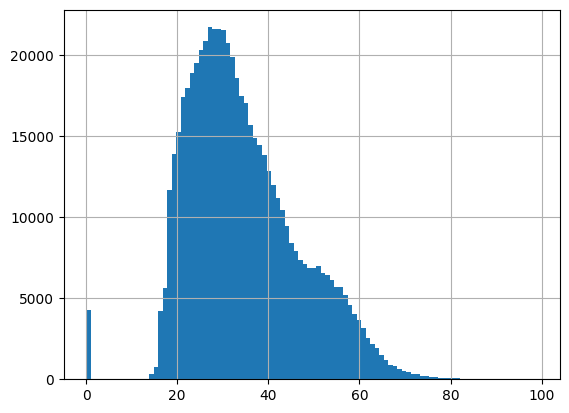

In [16]:
#Create histograms of Age_at_Crime and Age_at_Arrest

one_hot_encoded_df['Age_at_Crime'].hist(bins=100)

<Axes: >

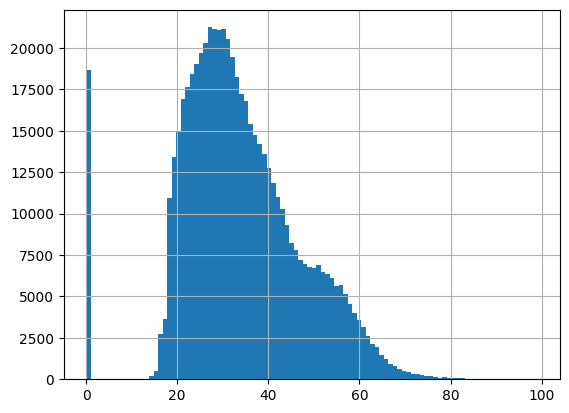

In [17]:
one_hot_encoded_df['Age_at_Arrest'].hist(bins=100)

Oh dear! Looks like Age_at_Crime and Age_at_Arrest have missing values encoded as 0. We should therefore be cautious about using these features unless we drop the zero values. We may wish to keep only one, like 'Age_at_Crime' and drop the records where that is 0.This is a good example of the iterative process of the lifecycle. Here, after we have started adapting to our prediction task, we see that we must return to data cleaning after noticing new information about missing values.

*Provide a written reflection on how and why values are missing for the age variables:* ....

**Solution**: We can see that for both Age_at_Crime and Age_at_Arrest encode missing age values as 0 instead of NaN.
If we were to keep these values in our data, it would skew the mean age and obscure our machine learning model, which we will eventually see is largely dependent on age as a feature.
The data generating process and human error is likely the reason why ages are encoded as 0s instead of NaNs; students should recognize where the data is coming from and why it is produced, which ultimately impacts its reliability and how we should interpret it.


In [18]:
#Deal with missing age values (i.e. drop, impute, etc.)
#Hint: Drop Age_at_Arrest, and drop the rows that encode Age_at_Crime as 0.

one_hot_encoded_df = one_hot_encoded_df.drop(one_hot_encoded_df[one_hot_encoded_df['Age_at_Crime'] == 0].index)
one_hot_encoded_df = one_hot_encoded_df.drop(columns=['Age_at_Arrest'])

#### **Feature Selection**

Feature selection, by which we reduce our dataset down to what are deemed the most important features in order to embark on our prediction task, is a pivotal part of any machine learning task. Given what we understand about the criminal justice system, we could select the features that we deem most important to train our model on. We could also use feature selection techniques such as the correlation coefficient, which measures the correlation between each feature in our dataset to the variable we are trying to predict.

Feature selection, by which we reduce our dataset down to what are deemed the most important features in order to embark on our prediction task, is a pivotal part of any machine learning task. Given what we understand about the criminal justice system, we could select the features that we deem most important to train our model on. We could also use feature selection techniques such as the correlation coefficient, which measures the correlation between each feature in our dataset to the variable we are trying to predict.

(a) The New York Criminal Justice Agency published [a study](https://www.nycja.org/assets/Updating-the-NYC-Criminal-Justice-Agency-Release-Assessment-Final-Report-June-2020.pdf) where they used a similar dataset to determine which features had the most power for predicting whether a defendant would fail to appear or not. This study was ultimately used to create a ["Release Assessment" tool](https://www.nycja.org/release-assessment) indended to help judges make decisions at the time of arraignment. Judges can plug in a defendant's information into the eight factors that the study deemed were most important:
1. Years since last bench warrant?
2. Two or more bench warrants in last five years? (Y/N)
3. Misdemeanor convictions in the last year? (Y/N)
4. Number of misdemeanor convictions in last three years?
5. Number of felony convictions in last ten years?
6. Number of pending cases?
7. Years living at last two addresses?
8. Reachable by phone? (Y/N)

Under this assessment system, each defendant begins with 25 points, which are deducted according to where they fall within each of these eight features. The score is then used to give a judge a reccomendation on whether to release them on their own recognizance or not.

*(Note that in this problem set, we are not building a model that predicts whether or not a defendant will fail to appear in court or not, but rather to predict judge decisions themselves).*

(i) What do you think are the potential pitfalls of using a release assessment algorithm in the judge decision-making process?

*Provide response here:* ...

**Sample Solution (Main Points):**

- Potential pitfalls include:

- Judges applying the risk assessment algorithm unevenly (i.e. unequal weight placed on the importance of a score from judge to judge).

- An obstruction of individualized justice. That is, a set number of features determining risk, and thus influencing a decision, rather than a judge's subjective, human-to-human measure of a defendant.

- This release assessment tool only utilizes static, and not dynamic, risk factors. See readings on COMPAS for more details.

(ii) No feature in our dataset that indicates if a judge relied on the assessment tool to make their decision. What is the problem with this?

*Provide response here: ...*

**Sample Solution (Main Points):**

- Unlike the Kleinberg et al. reading, our dataset does not include a feature that indicates the score, nor if a judge used the score.
- The model that we build without these features, then, may be an inaccurate reflection of judge decisions in the real world, in that it is missing a potentially key piece of information that is available to judges at the time of arraignment.

(iii) What metrics of success did the study's authors use to assess their predictions?

*Provide response here: ...*

**Sample Solution (Main Points):**

- The study's authors are focused on (1) predictive validity and (2) "fairness."
- They state that "the absolute rates and relative differences in ROR recommendations across race/ethnicity and sex are adopted as metrics of fairness."
- The authors also state that "absolute rates and relative differences in ROR recommendations, as well as false positive rates."
- Students should reflect on what it means to conflate these measures of accuracy with ones of fairness.

(iv) Built into this tool is the assumption that defendants under similar circumstances will behave the same way/ have the same outcome. What is the problem with this – and how does it fit into the larger discussion about human decision-making versus decision-making through ML models?

*Provide response here: ...*

**Sample Solution (Main Points):**

- Stepping away from the prediction task at hand, it is important to consider the place of a machine learning algorithm within the criminal justice system.
- An ML algorithm has the power to solidify and streamline assumptions about defendants. That is, there are a certain set of static features which would normally be considered among an array of factors, but are instead codified by an algorithm.

(b) Create a correlation matrix to find which features are most highly correlated with being released on the defendants’ own recognizance at the time of arraignment. What features are most highly correlated? Why do you think that is?

In [19]:
#Use the pandas unique function to see how many unique values are contained in each column -- it is probably not the best idea to one-hot encode the columns that have hundreds (or even thousands) of unique values, because the dimensionality of our data will get too huge!

for column in data_dropped.columns:
  unique_values = pd.unique(data_dropped[column])
  num_unique_values = len(unique_values)
  print(f"Column '{column}' has {num_unique_values} unique values.")

Column 'Internal_Case_ID' has 582981 unique values.
Column 'Gender' has 3 unique values.
Column 'Race' has 6 unique values.
Column 'Ethnicity' has 3 unique values.
Column 'Age_at_Crime' has 87 unique values.
Column 'Age_at_Arrest' has 86 unique values.
Column 'Court_Name' has 163 unique values.
Column 'Court_ORI' has 163 unique values.
Column 'County_Name' has 62 unique values.
Column 'District' has 14 unique values.
Column 'Region' has 2 unique values.
Column 'Court_Type' has 2 unique values.
Column 'Judge_Name' has 1107 unique values.
Column 'Offense_Month' has 13 unique values.
Column 'Offense Year' has 45 unique values.
Column 'Arrest_Month' has 13 unique values.
Column 'Arrest Year' has 41 unique values.
Column 'Arrest_Type' has 3 unique values.
Column 'Top_Arrest_Law' has 72 unique values.
Column 'Top_Arrest_Article_Section' has 876 unique values.
Column 'Top_Arrest_Attempt_Indicator' has 2 unique values.
Column 'Top_Charge_at_Arrest' has 2093 unique values.
Column 'Top_Charge_Se

,Age_at_Crime,Age_at_Arrest,Offense Year,Arrest Year,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,Post_Rollback,ROR_at_Arraign_Y
Age_at_Crime,1.000000,0.896042,0.037460,0.028697,0.149680,0.298837,0.325964,-0.078042,-0.008980,0.017969,-0.001384,0.006220,0.030748
Age_at_Arrest,0.896042,1.000000,0.075064,0.035167,0.140108,0.273384,0.303146,-0.072061,-0.005974,0.023506,-0.004090,0.006437,0.036034
Offense Year,0.037460,0.075064,1.000000,0.880375,0.037716,0.034957,0.037302,0.033551,0.046801,0.055559,0.009510,0.307827,-0.033563
Arrest Year,0.028697,0.035167,0.880375,1.000000,0.043254,0.038284,0.034375,0.040788,0.050967,0.051201,0.009731,0.369680,-0.056483
prior_vfo_cnt,0.149680,0.140108,0.037716,0.043254,1.000000,0.322745,0.330760,0.083437,0.107758,0.092699,0.292046,0.010311,-0.163985
prior_nonvfo_cnt,0.298837,0.273384,0.034957,0.038284,0.322745,1.000000,0.614694,0.049333,0.187007,0.163922,0.237933,0.005691,-0.183731
prior_misd_cnt,0.325964,0.303146,0.037302,0.034375,0.330760,0.614694,1.000000,0.081529,0.264436,0.309373,0.150886,-0.004812,-0.204017
pend_vfo,-0.078042,-0.072061,0.033551,0.040788,0.083437,0.049333,0.081529,1.000000,0.183379,0.149773,0.023460,0.020969,-0.146324
pend_nonvfo,-0.008980,-0.005974,0.046801,0.050967,0.107758,0.187007,0.264436,0.183379,1.000000,0.329038,0.053282,0.023250,-0.185991
pend_misd,0.017969,0.023506,0.055559,0.051201,0.092699,0.163922,0.309373,0.149773,0.329038,1.000000,0.026846,0.014876,-0.173470


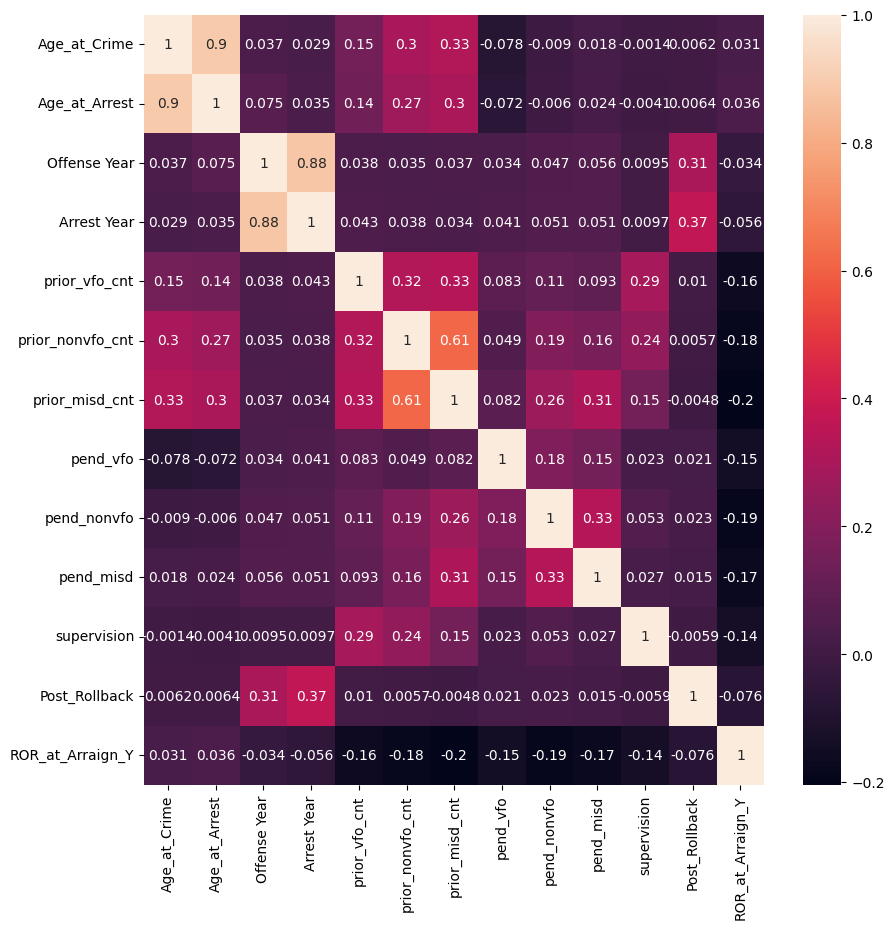

In [20]:
#Create a correlation matrix here of each of our features with the ROR_at_Arraign outcome.
#Reminder that a correlation matrix shows the correlation coefficient (scale from -1 to 1) of each of our features with the outcome variable and with each other.
#Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

corr_df = data_dropped.drop(columns='Internal_Case_ID')
corr_df_ohe = pd.get_dummies(data=corr_df, columns=['ROR_at_Arraign'], drop_first=True)
corr_matrix = corr_df_ohe.corr(numeric_only=True)

plt.figure(figsize=(10,10))
g = sns.heatmap(corr_matrix, annot=True)
corr_matrix

*Provide an explanation of your correlation matrix here: ...*

(c) Are any “protected classes” (i.e. race, gender, etc.) included in the most highly correlated features? Should they be included in our model? Why or why not?

*Provide response here: ...*

**Sample Solution (Main Points):**
- Protected class features are likely not included in many students' models. Instead, features that represent age and prior convictions tend to have more predictive power.
- Still, students should reflect on the debate surrounding including protected features in a machine learning model, i.e., how doing so can either mitigate or exacerbate bias.

## **UNDERSTAND THE WORLD – Prediction & Inference**

#### **Modeling, Prediction, and Performance Metrics**

(a) Partition the dataset into a training, test, and validation set.

In [21]:
#Drop the column that we are trying to predict
X = one_hot_encoded_df.drop('ROR_at_Arraign_Y', axis=1)

#Target variable - judge decision that we are trying to predict
y = one_hot_encoded_df['ROR_at_Arraign_Y']

#Set the random seed
np.random.seed(10)

#Split the data
#Hint: train_test_split returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

# split the data
#Hint: train_test_split returns 4 values: X_train, X_validate, y_train, y_validate
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

(b) Choose three different prediction techniques that are appropriate to the problem at hand. Describe the basic mechanism of each, benefits and drawbacks, and any other criteria you factored into your decision. Why is each a reasonable choice in this context.
*Hint: take a look at the different techniques and justifications in the classification labs.*

*Provide response here: ...*

**Sample Solution:**

The prediction techniques that are appropriate for the problem at hand are primarily classification models. In the problem at hand, we are attempting to make a predction on a binary scale: will a judge remand someone to jail or not. We are doing so on the basis of a variety of features available (and important) to the judge at the time of arraignment, in an attempt to mimic judge decision making in our model. Thus, the four models that I selected for this context are: logistic regression, ridge classification, decision tree classification, and random forest classification.

_Logistic regression_ is commonly used for binary clasification problems. The basic mechanism of logistic regression is that it assumes that the relationship between the input variables and output variables are linear, and that it uses the natural logarithm of odds as its loss function. This means that it estimates a probability between 0 and 1 of the outcome happening by dividing the probability of 1 by the probabilty of 0, arriving at the final probability by maximizing the log loss function to find the optimal paramaters. It then makes a prediction of either 0 or 1 (e.g. remanded to jail or not) based on a threshold. A benefit of using logistic regression for our specific purpose is that it is simple and easily interpretable; we also have the option of adjusting the threshold for classification if using sklearn LogisticRegression() if .5 does not work for our specific purposes. However, as noted before, logistic regression makes the critical assumption that the relationship between our input and output variables is linear, which can be problematic for our case, especially because we are using a dataset that contains many features that we do not necisarly know have a precise linear relationship or not. This can greatly effect the accuracy and general performance of our predictions.

_Decision tree classification_ works by predicting the target class through creating a "set of decision rules" (Lab 25). The basic mechanism of decision tree classifiers is that a tree is made up of nodes, which represent data points, as well as branches, which represent the outcome of the decision. At each node of a decision tree, the classifier determines which feature (in our case: age, race, priors, etc.) will allow for a split such that observations in different groups are as different as possible and observations in the same group are as similar as possible. The main drawback of using decision trees is that, because it is a more complex model, it can be more computationally expensive. This is especially the case for our example, as the training dataset contains many features. The advantages of using a tree-based algorithm for our application, though, outweighs the disadvantages. Unlike logistic regression, decision tree classifiers work best when the data is non-linear. Of even greater importance is that there are many features in our dataset, and some of the features may be more irrelevant (i.e. less correlated) with a judge remanding the defendant to jail, which is where decision trees perform best.

_Random forest classification_ is a type of decision tree classification, as it combines multiple decision trees to create a more robust classification model. The basic mechanism of random forest regression is that it operates as an ensemble method, meaning that it makes multiple decision trees that each produce a prediction of 1 or 0, and chooses the majority class out of all the trees. The drawbacks of such a model are similar to decision trees, in that because many trees are being made in order to produce a prediction for our observations, it can be computationally taxing. There are also some cases in which this method could be too sensitive to or overfit the training data. However, the advantages for using a random forest are more compelling than the potential drawbacks. Random forest classifiers are preferred over decision trees – especially for our purposes – because there exists a low correlation between trees, which makes it such that they offer greater protection against each tree's individual errors in classification. In other words, using a random forest often outperforms the decision tree classifier discussed above because a group of uncorrelated trees operating in tandem will likely be more accurate than any one tree alone.

(c) Create 3 models and report their accuracy as well as a false-positive/ false-negative rates through an [AUC-ROC curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) and a confusion matrix (note that this is one way of measuring the performance of our model – it gives us a sense of the metrics of recall, precision, specificity, and accuracy). There are [many definitions of fairness](https://arxiv.org/abs/1811.07867), which are largely based on the context of our question and what we value in our solution. Consider that your choice of model has implications on your ability to explain how it works; for example, a [logistic regression model](https://uu.diva-portal.org/smash/get/diva2:1459136/FULLTEXT01.pdf) is by nature more "explainable" than a more black-box method like random forests.

The modeling stage is where many important decisions are made, and assumptions – and sometimes [bias](https://compass.onlinelibrary.wiley.com/doi/full/10.1111/phc3.12760) – encoded. It is important that we establish how we are going to evaluate our model, making sure to take into account questions of transparency, bias and fairness in addition to traditional concerns of accuracy.

**Model 1 -- Logistic Regression**

In [22]:
#Model 1 -- Logistic Regression

#Initialize the model.
log_reg = LogisticRegression()

#Fit the model using the training set.
log_model = log_reg.fit(X_train, y_train)

#Make predictions on the test set.
log_pred = log_model.predict(X_test)

#Check the model's accuracy score. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Accuracy score on validation data.
print(log_model.score(X_validate, y_validate))

# Accuracy score on test data.
print(log_model.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7844917707028382
0.7827724739729578


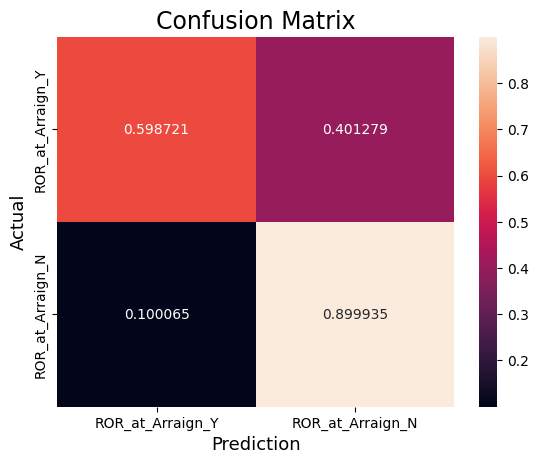

In [23]:
#Create a confusion matrix for the logistic regression model.
cm_logistic = confusion_matrix(y_test, log_pred, normalize='true')
cm_logistic

#Plot the confusion matrix.
sns.heatmap(cm_logistic,
            annot=True,
            fmt='g',
            xticklabels=['ROR_at_Arraign_Y','ROR_at_Arraign_N'],
            yticklabels=['ROR_at_Arraign_Y','ROR_at_Arraign_N'])
plt.ylabel('Actual',fontsize=13) #
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

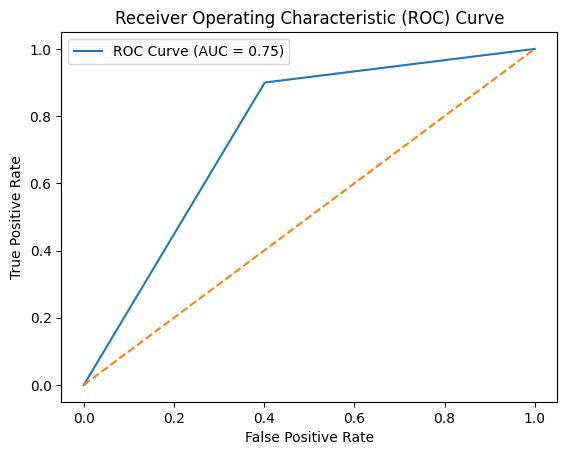

In [24]:
#Create an AUC-ROC curve for the logistic regression model.
fprlog, tprlog, thresholdslog = roc_curve(y_test, log_pred)
auclog = roc_auc_score(y_test, log_pred)

plt.plot(fprlog, tprlog, label='ROC Curve (AUC = %0.2f)' % auclog)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Model 2 -- Decision Tree Classifier**

In [25]:
#Model 2 -- Decision Tree Classifier

#Initialize the model.
decision_tree = DecisionTreeClassifier()

#Fit the model using the training set.
decision_model = decision_tree.fit(X_train, y_train)

#Make predictions on the test set.
decision_tree_pred = decision_model.predict(X_test)

#Check the model's accuracy score. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Accuracy score on validation data.
print(decision_model.score(X_validate, y_validate))

# Accuracy score on test data.
print(decision_model.score(X_test, y_test))

0.7565078405114691
0.7551168516998574


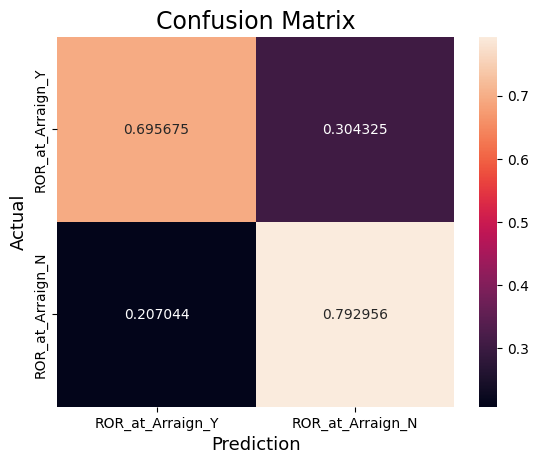

In [26]:
#Create a confusion matrix for the decision tree model.
cm_dt = confusion_matrix(y_test, decision_tree_pred, normalize='true')
cm_dt
#Plot the confusion matrix.
sns.heatmap(cm_dt,
            annot=True,
            fmt='g',
            xticklabels=['ROR_at_Arraign_Y','ROR_at_Arraign_N'],
            yticklabels=['ROR_at_Arraign_Y','ROR_at_Arraign_N'])
plt.ylabel('Actual',fontsize=13) #
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

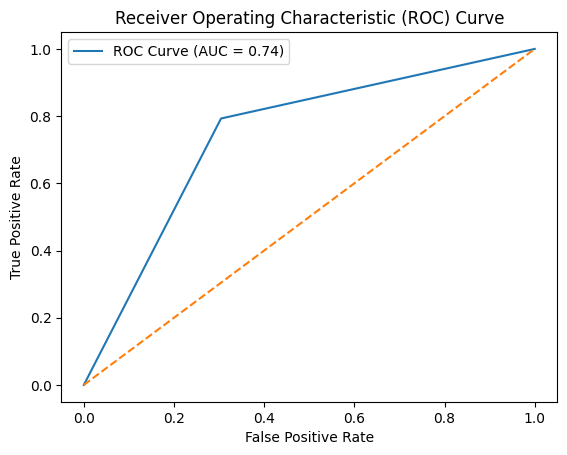

In [27]:
#Create an AUC-ROC curve for the decision tree model.
fprdt, tprdt, thresholdsdt = roc_curve(y_test, decision_tree_pred)
aucdt = roc_auc_score(y_test, decision_tree_pred)

plt.plot(fprdt, tprdt, label='ROC Curve (AUC = %0.2f)' % aucdt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Model 3 -- Random Forest Classifier**

In [28]:
#Model 3 -- Random Forest Classifier

#Initialize the model.
rf_class = RandomForestClassifier(n_estimators=100)

#Fit the model using the training set.
rf_model = rf_class.fit(X_train, y_train)

#Make predictions on the test set.
rf_predict = rf_model.predict(X_test)

#Check the model's accuracy score. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Accuracy score on validation data.
print(rf_model.score(X_validate, y_validate))

# Accuracy score on test data.
print(rf_model.score(X_test, y_test))

0.8120609961553414
0.8102121041945657


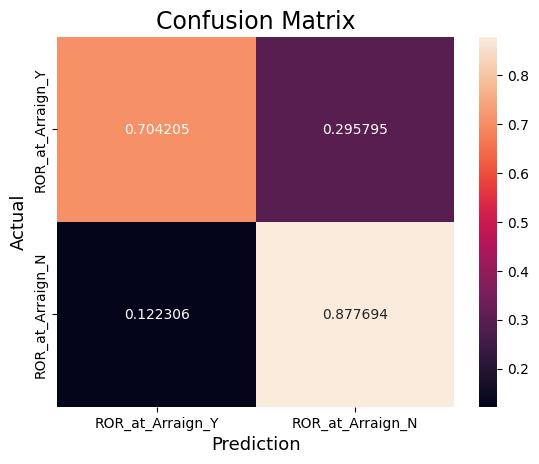

In [29]:
#Create a confusion matrix for the random forest model.
cm_rf = confusion_matrix(y_test, rf_predict, normalize='true')
cm_rf
#Plot the confusion matrix.
sns.heatmap(cm_rf,
            annot=True,
            fmt='g',
            xticklabels=['ROR_at_Arraign_Y','ROR_at_Arraign_N'],
            yticklabels=['ROR_at_Arraign_Y','ROR_at_Arraign_N'])
plt.ylabel('Actual',fontsize=13) #
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

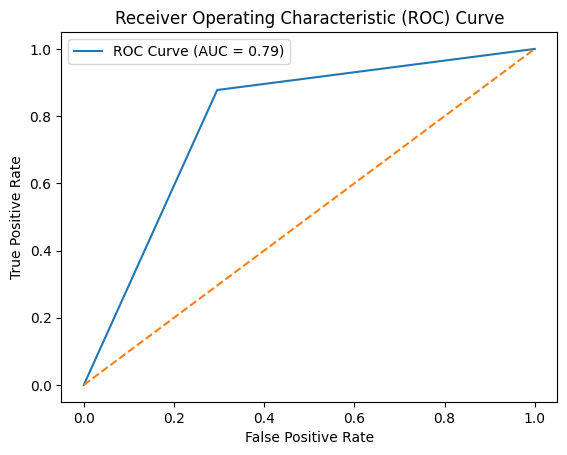

In [30]:
#Create an AUC-ROC curve for the random forest model.
fprrf, tprrf, thresholdsrf = roc_curve(y_test, rf_predict)
aucrf = roc_auc_score(y_test, rf_predict)

plt.plot(fprrf, tprrf, label='ROC Curve (AUC = %0.2f)' % aucrf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

(d) Choose one of the three models you created and report the top 10 features with the most predictive value. Use Pandas `coef_` or `feature_importances_`, depending on which model you pick. Then, provide a brief discussion on your interpretation of the most important features.

In [31]:
#Use a pandas function to get the most important features.
features_df = pd.DataFrame({'feature': X_test.columns,
             'importance': rf_model.feature_importances_})
top_ten_features = features_df.sort_values('importance', ascending=False).head(10)
top_ten_features

,feature,importance
0,Age_at_Crime,0.120737
164,Pretrial_Supervision_at_Arraign_Y,0.063545
3,prior_misd_cnt,0.042463
98,Top_Charge_at_Arraign_Violent_Felony_Ind_Y,0.024008
2,prior_nonvfo_cnt,0.023653
97,Top_Severity_at_Arraign_Misdemeanor,0.021460
161,pend_misd_1.0,0.018705
166,Release Decision at Arraign_Unknown,0.016805
89,Arrest_Type_DAT,0.016533
160,pend_nonvfo_1.0,0.016451


*Discussion of most important features: ...*

**Sample Solution (Main Points)**:

- We can see that age and prior convictions are among the most important features in the model.
- This will likely be true regardless of the type of model that students pick, as this is reflective of judge decision-making at arraignment.
- Similar patterns can be seen in recidivism algorithms (i.e., COMPAS and PATTERN), which students read about for class.


#### **Interpretability**

(a) Create a dataframe that can be used to analyze your model’s performance, especially relative to judges. This should contain (1) all the features the model was trained on, (2) the judge’s arraignment release decision, (3) the probability score of the data point computed by the model, and (4) the model’s ultimate prediction.

In [32]:
#Find the probability score of the data point computed by the model.
#Hint: use pandas predict_proba function, and remember which portion of the dataset you should be running this on.
predict_probas = rf_model.predict_proba(X_test)[:, 1]

In [33]:
#Construct a dataset that includes all the features, the judge's actual decisions, the predict_probas, and the model's predictions.
interpretability_dataframe = X_test.copy()

interpretability_dataframe["Judge Decision"] = y_test
interpretability_dataframe["Model Prediction"] = rf_predict
interpretability_dataframe["Probability Score"] = predict_probas
interpretability_dataframe

,Age_at_Crime,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Post_Rollback,Race_Asian/Pacific Islander,Race_Black,Race_Other,Race_Unknown,Race_White,...,Top_Charge_Weight_at_Arraign_CF,Top_Charge_Weight_at_Arraign_DF,Top_Charge_Weight_at_Arraign_EF,Top_Charge_Weight_at_Arraign_UM,Court_Type_Superior,Top_Arraign_Attempt_Indicator_Attempt,Representation_at_Securing_Order_Y,Judge Decision,Model Prediction,Probability Score
484841,28,0.0,0.0,3.0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0.03
232367,22,0.0,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0.89
254754,45,0.0,0.0,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0.99
135808,32,0.0,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0.41
359586,24,0.0,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535178,43,1.0,2.0,10.0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.01
574195,34,0.0,2.0,10.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0.89
18110,43,0.0,2.0,10.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.34
125882,27,1.0,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0.65


#### **Evaluate the Model Further**

Choose one model out of the three you created above. We want a way to compare this model to actual judge decisions, specifically focusing on different demographic groups. Because our data is a product of the criminal justice system – which disproportionately arrests and incarcerates Black men – it is within our interest to examine how our model performs, and if there are any differences, between racial groups.

(a) Compute the average judge decision, model probability score, and model prediction for 1) all cases, 2) cases with black defendants, 3) cases with non-black defendants, 4) cases with male defendants, 5) cases with non-male defendants, 6) cases with defendants at or above the median age, and 7) cases with defendants below the median age. What do you observe about race, gender, and age differences for these scores? Include visualizations to help your audience understand the group differences.

*(Remember, the average in this context means the proportion of 1s, or in other words, the proportion of defendants of a given demographic group that a judge released on their own recognizance.)*

In [34]:
#1) All cases
allcase_judge = np.mean(interpretability_dataframe["Judge Decision"])
allcase_probscore = np.mean(interpretability_dataframe["Probability Score"])
allcase_modelpred = np.mean(interpretability_dataframe["Model Prediction"])

print("Average judge decision for all cases:", allcase_judge)
print("Average probability score for all cases:", allcase_probscore)
print("Average model prediction for all cases:", allcase_modelpred)

Average judge decision for all cases: 0.6110328739902372
Average probability score for all cases: 0.6112011422111432
Average model prediction for all cases: 0.651354270162858


In [35]:
#2) Cases with Black defendants
black_df = interpretability_dataframe.loc[interpretability_dataframe['Race_Black'] == True] #filter the dataframe here

black_judge = np.mean(black_df["Judge Decision"])
black_probscore = np.mean(black_df["Probability Score"])
black_modelpred = np.mean(black_df["Model Prediction"])

print("Average judge decision for cases with Black defendants:", black_judge)
print("Average probability score for cases with Black defendants:", black_probscore)
print("Average model prediction for cases with Black defendants:", black_modelpred)

Average judge decision for cases with Black defendants: 0.5465695130274199
Average probability score for cases with Black defendants: 0.5467666105464226
Average model prediction for cases with Black defendants: 0.5767594042314023


In [36]:
#3) Cases with non-Black defendants
nonblack_df = interpretability_dataframe.loc[interpretability_dataframe['Race_Black'] == False]

nonblack_judge = np.mean(nonblack_df["Judge Decision"])
nonblack_probscore = np.mean(nonblack_df["Probability Score"])
nonblack_modelpred = np.mean(nonblack_df["Model Prediction"])

print("Average judge decision for cases with non-Black defendants:", nonblack_judge)
print("Average probability score for cases with non-Black defendants:", nonblack_probscore)
print("Average model prediction for cases with non-Black defendants:", nonblack_modelpred)

Average judge decision for cases with non-Black defendants: 0.6597448693251626
Average probability score for cases with non-Black defendants: 0.6598913525721947
Average model prediction for cases with non-Black defendants: 0.7077221775600285


In [37]:
#4) Cases with male defendants
male_df = interpretability_dataframe.loc[interpretability_dataframe['Gender_Male'] == True] #filter the dataframe here

male_judge = np.mean(male_df["Judge Decision"])
male_probscore = np.mean(male_df["Probability Score"])
male_modelpred = np.mean(male_df["Model Prediction"])

print("Average judge decision for cases with male defendants:", male_judge)
print("Average probability score for cases with male defendants:", male_probscore)
print("Average model prediction for cases with male defendants:", male_modelpred)

Average judge decision for cases with male defendants: 0.5832665612750937
Average probability score for cases with male defendants: 0.5852937933270224
Average model prediction for cases with male defendants: 0.6201572211274011


In [38]:
#5) Cases with non-male defendants
nonmale_df = interpretability_dataframe.loc[interpretability_dataframe['Gender_Male'] == False] #filter the dataframe here

nonmale_judge = np.mean(nonmale_df["Judge Decision"])
nonmale_probscore = np.mean(nonmale_df["Probability Score"])
nonmale_modelpred = np.mean(nonmale_df["Model Prediction"])

print("Average judge decision for cases with non-male defendants:", nonmale_judge)
print("Average probability score for cases with non-male defendants:", nonmale_probscore)
print("Average model prediction for cases with non-male defendants:", nonmale_modelpred)

Average judge decision for cases with non-male defendants: 0.7206617929973067
Average probability score for cases with non-male defendants: 0.7134903687873515
Average model prediction for cases with non-male defendants: 0.7745286648711043


In [39]:
#6) Cases with defendants at or above the median age
median_age = np.median(interpretability_dataframe['Age_at_Crime'])
medianage_df = interpretability_dataframe.loc[interpretability_dataframe['Age_at_Crime'] >= median_age] #filter the dataframe here

medianage_judge = np.mean(medianage_df["Judge Decision"])
medianage_probscore = np.mean(medianage_df["Probability Score"])
medianage_modelpred = np.mean(medianage_df["Model Prediction"])

print("Average judge decision for cases with defendants at or above the median age:", medianage_judge)
print("Average probability score for cases with defendants at or above the median age:", medianage_probscore)
print("Average model prediction for cases with defendants at or above the median age:", medianage_modelpred)

Average judge decision for cases with defendants at or above the median age: 0.6140887456862008
Average probability score for cases with defendants at or above the median age: 0.6117163834894226
Average model prediction for cases with defendants at or above the median age: 0.6500220801099099


In [40]:
#7) Cases with defendants below the median age
medianagebelow_df = interpretability_dataframe.loc[interpretability_dataframe['Age_at_Crime'] < median_age] #filter the dataframe here

medianagebelow_judge = np.mean(medianagebelow_df["Judge Decision"])
medianagebelow_probscore = np.mean(medianagebelow_df["Probability Score"])
medianagebelow_modelpred = np.mean(medianagebelow_df["Model Prediction"])

print("Average judge decision for cases with defendants below the median age:", medianagebelow_judge)
print("Average probability score for cases with defendants below the median age:", medianagebelow_probscore)
print("Average model prediction for cases with defendants below the median age:", medianagebelow_modelpred)

Average judge decision for cases with defendants below the median age: 0.6076111640172881
Average probability score for cases with defendants below the median age: 0.6106242180481644
Average model prediction for cases with defendants below the median age: 0.6528459453519888


In [41]:
#Create a dataframe with the judge predictions for all of the 7 demographic groups.
judge_df_all = pd.DataFrame({"Demographic Group": ["All defendants", "Black defendants", "Non-Black defendents", "Male defendants", "Non-male defendants", "Defendants at or above the median age", "Defendants below the median age"],
                             "Average Judge Decision": [allcase_judge, black_judge, nonblack_judge, male_judge, nonmale_judge, medianage_judge, medianagebelow_judge]})
#Create a bar chart showing the probability score per demographic group.
px.bar(judge_df_all, x="Demographic Group", y="Average Judge Decision", title="Average Judge Decision per Demographic Group")

In [42]:
#Create a dataframe with the probability score for all of the 7 demographic groups.
probscore_df_all = pd.DataFrame({"Demographic Group": ["All defendants", "Black defendants", "Non-Black defendents", "Male defendants", "Non-male defendants", "Defendants at or above the median age", "Defendants below the median age"],
                             "Average Probability Score": [allcase_probscore, black_probscore, nonblack_probscore, male_probscore, nonmale_probscore, medianage_probscore, medianagebelow_probscore]})
#Create a bar chart showing the probability score per demographic group.
px.bar(probscore_df_all, x="Demographic Group", y="Average Probability Score", title="Average Probability Score per Demographic Group")

In [43]:
#Create a dataframe with the model predictions for all of the 7 demographic groups.
modelpred_df_all = pd.DataFrame({"Demographic Group": ["All defendants", "Black defendants", "Non-Black defendents", "Male defendants", "Non-male defendants", "Defendants at or above the median age", "Defendants below the median age"],
                             "Average Model Prediction": [allcase_modelpred, black_modelpred, nonblack_modelpred, male_modelpred, nonmale_modelpred, medianage_modelpred, medianagebelow_modelpred]})
#Create a bar chart showing the average model prediction per demographic group.
px.bar(modelpred_df_all, x="Demographic Group", y="Average Model Prediction", title="Average Model Prediction per Demographic Group")

(b) Within the context of the systemic racial biases embedded within the U.S. criminal justice system, what do you notice about the above group differences between actual judge predictions, model predictions, and probability scores?

_Provide response here: ..._

**Sample Solution:**
- Any response that summarizes and reflects on the charts above will recieve credit. Students should also acknowledge injustices based on race in their response.



## **Final Reflection Questions**

1. What have you learned about the Data Science Lifecycle throughout this problem set? Are there any ethical considerations that remain unsolved?

    *Provide response here: ...*

    **Sample Solution (Main points):**
    - Ethics can (and should) be embedded throughout each step of the Data Science lifecycle.
    - At each step of the lifecycle, along with technical choices, we should prioritize thinking about and incorporating considerations on who our choices affect, and which structures they may or may not reproduce.
    - There is not necessarily a standard definition or set of guidelines about what you should do to make an "ethical" decision while creating a model.


    

2. This [paper](https://dl.acm.org/doi/pdf/10.1145/3351095.3372859) by Barabas et al. suggests that models like the one you made in this problem set – which aim to make predictions about judge decision making instead of about defendants themselves – is a form of studying the power structure as a whole. Reflect.

    *Provide response here: ...*

    **Sample Solution (Main points)**:
    - There is no one correct answer for this question; students are encouraged to read the paper and provide any of their reactions or thoughts.
    - They can, however, mention these things which show understanding of the paper's main ideas:
        - Contextualizing data science as a "sociotechnical process."
        - Studying "up."
        - Limitations of the fairness debate in pretrial risk assessment.



3. Imagine that you are a data scientist in an agency hired to assess judge decision making in New York, given the pretrial release dataset. What insights have you gleaned from the process of making a model that predicts a judge's decision to release someone on their own recognizance or not? Is there anything you would have done differently (i.e. with cleaning the data, the choice of model, etc.) and why?

    *Provide response here: ...*

    **Sample Solution (Main points)**:
    - Insights on modeling process:
      - Feature importance and key predictors:
          - Prior criminal history: One of the most predictive features is likely to be whether a defendant has a prior criminal record, including the number of prior arrests or convictions. Judges may weigh the risk of reoffending heavily.
          - Demographic factors: Factors such as age, gender, and race might also influence decisions. A model might reveal implicit biases if certain demographic groups are less likely to receive ROR despite similar circumstances.
      - Decisions throughout the Data Science Lifecycle can greatly impact your model and the deicisions gleaned from it:
          - Dealing with missing values.
          - Filtering your dataset.
          - Choosing which features to use.
          - Deciding which models and metrics to utilize.

    - Anything you would have done differently: for the second part of this question, any answer that shows that a student reflected on an aspect of their work and thought through a different way of going about a problem should get full credit.

  
4.	As Kleinberg et al. noted, criminal court judges in New York City are able to avail themselves of a risk assessment algorithm (which is designed to predict risk of non-appearance, which is the "official" reason for a judge to assign bail). The risk assessment algorithm is from an NGO, the [New York City Criminal Justice Agency](https://www.nycja.org/). The NGO does an intake interview and creates a simple [risk assessment](https://www.nycja.org/ra-court-forms) that is then reported to the judge, who may or may not take it into consideration in making the pretrial release decision. How do the predictive features you found align with those in the Criminal Justice Agency's algorithm? What additional data does the CJA have that you do not, and why do think those additional items are good predictors of appearance post-arraignment?

    *Provide response here: ...*

    **Sample Solution (Main points)**:
    - Comparison of predictive features:
        - Similarities: Both the CJA algorithm and our model include basic vairables such as age and prior criminal history. Based on the student's individual model, they may also have other features in common with the CJA tool.
        - Differences: Most students' models will incorporate many more features beyond what the CJA uses, including race, region, representation type, etc.
    - The CJA has a few variables that are not included in our dataset which could be relevant to a judge. These include: number of years living at last two adresses, information on prior bench warrants, and whether or not the defendant is reachable by phone.